In [1]:
# import all necessary modules

import pandas as pd
import numpy as np
import os
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn import svm
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

C:\Users\jho\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# read all individual text reviews to a list of lists then convert to a dataframe

filepath = 'C:/Users/jho/Desktop/data_science/op_spam_v1.4'
dict_reviews = []

negative_or_positive = 'negative_polarity'

for polarity in os.listdir(filepath):
    deceptive_or_truthful = 'deceptive_from_MTurk'
    for classification in os.listdir(filepath+'/{}'.format(negative_or_positive)):
        i = 1
        for fold in os.listdir(filepath+'/{}'.format(negative_or_positive)+'/{}'.format(deceptive_or_truthful)):
            for file in os.listdir(filepath+'/{}'.format(negative_or_positive)+'/{}'.format(deceptive_or_truthful)+'/fold{}'.format(i)):
                with open(filepath+'/{}'.format(negative_or_positive)+'/{}'.format(deceptive_or_truthful)+'/fold{}/'.format(i)+file) as f:
                    dict_reviews.append([file, f.readline()])
                    
            i += 1
        
        if len(dict_reviews) < 401:
            deceptive_or_truthful = 'truthful_from_Web'
        elif len(dict_reviews) > 402:
            deceptive_or_truthful = 'truthful_from_TripAdvisor'
            
    negative_or_positive = 'positive_polarity'
    
#print(len(dict_reviews))
#print(dict_reviews)

all_reviews_df = pd.DataFrame(dict_reviews, columns=['index', 'review'])

#print(all_reviews_df)

# add columns for the classification to the all_reviews_df dataframe.

all_reviews_df.insert(2, 'negative', np.nan)
all_reviews_df.insert(3, 'deceptive', np.nan)

#print(all_reviews_df)

for i in range(0, len(all_reviews_df)):
    
    if i < 800:
        all_reviews_df['negative'].loc[i] = '1'
    else:
        all_reviews_df['negative'].loc[i] = '0'
        
    if 400 <= i < 800:
        all_reviews_df['deceptive'].loc[i] = '0'
    elif i >= 1200:
        all_reviews_df['deceptive'].loc[i] = '0'
    else:
        all_reviews_df['deceptive'].loc[i] = '1'
        
#print(all_reviews_df)

# create a dataframe with only the reviews

text_only = all_reviews_df['review']

#print(text_only.head())

C:\Users\jho\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [3]:
## for count vectorizer ##

def make_xy(data, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer(min_df=0, ngram_range=(1,3))
    X = vectorizer.fit_transform(all_reviews_df['review'])
    X = X.tocsc()  # some versions of sklearn return COO format
    #y1 = (data.negative == '1').values.astype(np.int)
    y = (data.deceptive == '1').values.astype(np.int)
    return X, y
X, y = make_xy(all_reviews_df)

In [4]:
# shuffle split - multinomial naive bayes

ss = ShuffleSplit(n_splits=1, test_size=0.25)

for train_index, test_index in ss.split(X):
    
    #print("%s %s" % (train_index, test_index))
    print("%s" % (test_index))
    
    clf = MultinomialNB()
    clf_fit = clf.fit(X[train_index], y[train_index])
    prediction = clf_fit.predict(X[test_index])
    
    print(prediction)

    print('accuracy for training data: ', clf_fit.score(X[train_index], y[train_index]))
    print('accuracy for testing data: ', clf_fit.score(X[test_index], y[test_index]))
    print('')

[ 553  702  297 1201   92  496  376  736 1387  583  915 1360  141  522 1057
 1321 1473  610  605 1363  460  930  346  262  131  134  251 1327  452 1571
  690  218 1534 1156   13  149  628 1325 1490 1117   49  296  805  637 1009
  264 1302 1087   24 1085 1105  578  872 1383  319  745  843 1381    0 1574
  901 1160 1230  514  831 1054  556 1150  284  757  588 1169 1532 1499  411
  963  500   58  973  332  827  866  792   91 1480 1459  608 1301  952 1329
  814  602  344 1493  563  239   52  101 1252 1255  755  730  871  340  909
 1343  554 1202  423 1407 1139  548 1314 1536 1365  359  321  945  277  455
  561  776  429  676  885 1293 1510 1290  354  492   67  108 1205  388 1422
  790 1116 1217 1222 1004  465   87 1069  152 1428   20  981  351  259 1452
  645  285 1436 1288  875 1074  130 1488 1581   64  233  528  786 1542  595
  674  483  395 1563 1073  900  747  112 1076  446  910  727  922  178  165
  671 1204 1172 1583  382  940 1254 1141 1524 1589 1020   71   47  769  775
  648  515 1

In [5]:
## only linear svm

for train_index, test_index in ss.split(X):
    
    #print("%s %s" % (train_index, test_index))
    print("%s" % (test_index))
    
    clf = svm.SVC(kernel='linear')
    clf_fit = clf.fit(X[train_index], y[train_index])
    prediction = clf_fit.predict(X[test_index])

    print(prediction)
    
    print('accuracy for training data: ', clf_fit.score(X[train_index], y[train_index]))
    print('accuracy for testing data: ', clf_fit.score(X[test_index], y[test_index]))

[1059  563    2 1032 1182  502  499  159   66  548 1004 1162  561 1021 1502
  987  758  852  706  922 1359   72 1429 1579  598  511  960  430  840 1057
 1100 1045  496  238 1384  498  443  948  164  870  812 1019  722  523  747
 1427 1148  121 1544  611 1419  731  613 1477  914 1547  814  474 1585  424
 1507 1288  664 1000 1597 1064  193  186  184 1387 1129  360 1469  861 1191
  308  402   32 1063  625   74 1451  656 1086 1138 1338 1253  734 1189 1442
  810 1280   51  789 1311 1069  447 1209  930 1107  421  129  119 1424  145
  605   39  222 1203 1351  324 1301   55  808 1314 1005  634  933  711 1319
  386  197  398  757  784  282  286  844  227  211  697 1092  161  333  288
  864  510 1206  983 1560 1256  451  901  380  889  208  558  709 1048  452
 1514  480 1474  383   11 1373  464  957 1195  635 1247 1014  185  146 1461
  603  236 1421  695  112  228  970  490  848  355  805 1467 1224  668  139
 1181  599   95  518  936 1371   77  955 1013  448  395  893  855  796  415
  572 1478  

In [6]:
#### for tfidf vectorizer ####

def make_xy(data, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = TfidfVectorizer(min_df=0, ngram_range=(1,3))
    X = vectorizer.fit_transform(all_reviews_df['review'])
    X = X.tocsc()  # some versions of sklearn return COO format
    #y1 = (data.negative == '1').values.astype(np.int)
    y = (data.deceptive == '1').values.astype(np.int)
    return X, y
Xtfidf, ytfidf = make_xy(all_reviews_df)

In [7]:
# TFIDF Vectorizer for MultinomialNB and Linear SVM

ss = ShuffleSplit(n_splits=1, test_size=0.25)

for train_index, test_index in ss.split(Xtfidf):
    
    #print("%s %s" % (train_index, test_index))
    print("%s" % (test_index))
    
    clf = LinearSVC()
    #clf = svm.SVC(kernel='linear')
    #clf = MultinomialNB()
    clf_fit = clf.fit(Xtfidf[train_index], ytfidf[train_index])
    prediction = clf_fit.predict(Xtfidf[test_index])
    
    print(prediction)

    training_accuracy = clf.score(Xtfidf[train_index], ytfidf[train_index])
    testing_accuracy = clf.score(Xtfidf[test_index],ytfidf[test_index])

    print("Accuracy on training data: {:2f}".format(training_accuracy))
    print("Accuracy on test data:     {:2f}".format(testing_accuracy))
    print('')

[ 351  763 1198  290  749  447 1016  279  885  493 1076  346 1134 1302 1521
  510  232  316 1538 1440 1450   32  549  504  713  865  488 1447   56  136
  758  942  977 1002  664 1384 1277 1346 1043  481 1373   91  679  173  545
  607  805  982  401  153 1145 1533  554  430 1111 1514  768  380  665  277
  244   11  611  328  131  626  261  897 1287    3  719 1360 1075  423 1295
  866 1274 1386 1077  818   31 1015  421  943  309 1544  888 1130  509 1465
 1389 1181 1006 1390  597 1362 1061 1301   72  809  651 1254  249  816  343
  535 1037  200 1454 1470  416 1176 1270 1223 1458  652  957  160 1513  867
 1475 1438  908 1472 1115  786 1456  219 1011 1163 1326 1139   79  881 1416
  775 1460  649  736 1045  242  498 1258  703 1294 1427 1313  601  397 1457
 1050  424 1110  475 1481 1199  500  811   34  721  441  716 1515  268 1306
  301   68  672  352 1435  503 1535  340  585  283 1018 1505 1092  625 1169
   38  135  959  868 1483  455   22  993  333  973 1054   17  220  372  409
  609 1167  

In [8]:
### manual inspection of reviews - returning the index
# (0-399) and (800-1199) are deceptive
# (400-799) and (1200-1599) are truthful

#index = 451

#print(all_reviews_df['index'].loc[index])
#print(all_reviews_df['review'].loc[index])

In [9]:
## this prints all of the incorrectly classified reviews

wrong_predictions = []

for index in range(len(prediction)):
    if y[test_index[index]] != prediction[index]:
        wrong_predictions.append([all_reviews_df['index'].loc[test_index[index]], all_reviews_df['review'].loc[test_index[index]], all_reviews_df['deceptive'].loc[test_index[index]]])

wrong_predictions = pd.DataFrame(wrong_predictions)
print(len(wrong_predictions))
print('')

for i in range(len(wrong_predictions)):
    print(wrong_predictions[0].loc[i])
    print(wrong_predictions[1].loc[i])

#print(wrong_predictions)

43

t_monaco_16.txt
Over-hyped and over-priced. The fact that they have a complimentary wine reception every night at 5 doesnt take away from the fact that they have terrible beds and the place isnt as clean as it should be for a 4 star hotel. The hallways smelled like a dog parlor and the carpets in my room look like they hadn't been cleaned...well, ever. The decorative pillows on my bed were so filthy they were actually stained brown and looked like they had been sitting outside for everyone to use and then put back on my bed. The decor of the hotel was nice and eclectic but it wasnt enough to convince me to ever stay here again. The bed was the most uncomfortable thing I have every tried to sleep on. I couldnt sleep the whole week that I stayed there. It was hard and lumpy and the pillows were tiny. my final say is that it is an over priced Holiday Inn.....

d_hyatt_6.txt
Great hotel!! The staff is very friendly and helpful. The room was in perfect shape, very clean and just a beaut

In [10]:
### trying to get most important features from tfidf

# use nested for loops to iterate over all rows in each column
# find the total count/average of columns and sort by the highest columns...
# also match the highest columns to the key:value pairs of the dictionary

feature_scores = []
"""
for i in range(X.count(axis=1)):
    #for j in range(X.count(axis=0)):
    average = sum(X.count(axis=1)[i])
    feature_scores.append(average)
    
print(feature_scores)
"""

# creates a dict of vocabulary

tfidf = TfidfVectorizer()

csr_mat = tfidf.fit_transform(wrong_predictions[1])

print(csr_mat)

index_words = tfidf.vocabulary_
#index_words = list(tfidf.vocabulary_)

print(index_words)

#words = tfidf.get_feature_names()

#print(words)

  (0, 897)	0.204088121565
  (0, 632)	0.0930050297583
  (0, 75)	0.181870573711
  (0, 970)	0.186010059517
  (0, 1230)	0.272805860566
  (0, 475)	0.186010059517
  (0, 1229)	0.153966824552
  (0, 1238)	0.21526858976
  (0, 588)	0.129161153856
  (0, 291)	0.0772471453341
  (0, 1389)	0.0930050297583
  (0, 1015)	0.0680293738551
  (0, 448)	0.154494290668
  (0, 851)	0.0588116023762
  (0, 115)	0.0346939283608
  (0, 389)	0.0930050297583
  (0, 1212)	0.0930050297583
  (0, 130)	0.0772471453341
  (0, 534)	0.0365136050066
  (0, 1226)	0.0930050297583
  (0, 150)	0.0645249397829
  (0, 946)	0.0680293738551
  (0, 673)	0.0930050297583
  (0, 108)	0.0975341107172
  (0, 262)	0.0564163551976
  :	:
  (42, 544)	0.0335852408983
  (42, 170)	0.0335852408983
  (42, 804)	0.0335852408983
  (42, 950)	0.0335852408983
  (42, 136)	0.0335852408983
  (42, 709)	0.0335852408983
  (42, 255)	0.0335852408983
  (42, 723)	0.0335852408983
  (42, 1073)	0.0335852408983
  (42, 506)	0.0335852408983
  (42, 1185)	0.0335852408983
  (42, 1310)	

In [11]:
csr_mat.shape

(43, 1411)

In [12]:
# function for finding the top deceptive and truthful features

def get_top_feature_names(classifier, feature_names, top_features=20):
    
    coef = classifier.coef_.ravel()
    top_positive_coefficients = np.argsort(coef)[-top_features:]
    top_negative_coefficients = np.argsort(coef)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    
    feature_names = np.array(feature_names)
    #return feature_names

    return feature_names[top_coefficients]

In [13]:
# return top n features of all reviews using count vectorizer or tfidf vectorizer

features = []

vectorizer = TfidfVectorizer(min_df=0, ngram_range=(1,3)).fit(text_only)

#vectorizer = CountVectorizer(min_df=0, ngram_range=(1,2)).fit(text_only)

#clf = LinearSVC()
clf.fit(X[train_index], y[train_index])

feature_names = get_top_feature_names(clf, vectorizer.get_feature_names(), 30)

for feature_name in range(len(feature_names)):
    
    features.append(feature_names[feature_name])
    
    print(features[feature_name])
    
    if feature_name == len(feature_names)/2:
        print('')
    
#print(features[feature_names])

location
floor
breakfast
this
bathroom
small
great
rate
booked
excellent
concierge
called
on
conference
the hotel
nights
street
michigan
helpful
times
no
walk
reviews
before
can
window
large
for
good
through
my stay at

food
spa
to anyone
hilton
hotel
atmosphere
more
husband
will
place
this hotel
modern
looking
the food
elegant
towels
seemed
staying
room service
around
definitely
amazing
my
my stay
vacation
experience
when
luxury
chicago


In [14]:
#### for finding top features of misclassified reviews ####

def make_xy(data, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = TfidfVectorizer(min_df=0, ngram_range=(1,3))
    X = vectorizer.fit_transform(data[1])
    X = X.tocsc()  # some versions of sklearn return COO format
    #y1 = (data.negative == '1').values.astype(np.int)
    y = (data[2] == '1').values.astype(np.int)
    return X, y
#X_feat, y_feat = make_xy(all_reviews_df)

In [15]:
# for finding the top deceptive and truthful features for the misclassified reviews

features = []

X_feat_wrong, y_feat_wrong = make_xy(wrong_predictions)

vectorizer = TfidfVectorizer(min_df=0, ngram_range=(1,3)).fit(wrong_predictions[1])

#cv = CountVectorizer(min_df=0, ngram_range=(1,2)).fit(text_only)

#clf = LinearSVC()
clf.fit(X_feat_wrong, y_feat_wrong)

feature_names = get_top_feature_names(clf, vectorizer.get_feature_names(), 30)

for feature_name in range(len(feature_names)):
    
    features.append(feature_names[feature_name])
    
    print(features[feature_name])
    
    if feature_name == len(feature_names)/2:
        print('')
    
#print(features[feature_names])

imp = clf.coef_.ravel()
imp, names = zip(*sorted(zip(imp, feature_names)))

#print(names[:10]) # top 10, which are the most negative and do not lead to deceptive
#print(names[-10:]) # back 10, which are the most positive and related to deceptive

my
had
the
check
out
as
at
amazing
only
and
affina
at the
was
check in
and the
the hotel
it was
in
all
having
that
definitely
she
the affina
suite
bed
staying
they
to check
an
you re

for two
we stayed
the city
this hotel is
on our
come
affinia
excellent
bathrobe
slippers
re
is very
area
its
pool
would
the location
you can
definetly
nice
this hotel
if you
very nice
this
city
if
great
we
you


In [17]:
## this prints all of the correctly classified reviews

right_predictions = []

for index in range(len(prediction)):
    if y[test_index[index]] == prediction[index]:
        right_predictions.append([all_reviews_df['index'].loc[test_index[index]], all_reviews_df['review'].loc[test_index[index]], all_reviews_df['deceptive'].loc[test_index[index]]])

right_predictions = pd.DataFrame(right_predictions)
print(len(right_predictions))
print('')

for i in range(len(right_predictions)):
    print(right_predictions[0].loc[i])
    print(right_predictions[1].loc[i])

#print(right_predictions)

357

d_amalfi_2.txt
As a former Chicagoan, I'm appalled at the Amalfi Hotel Chicago. First of all, I was expecting luxury and hospitality, neither of which I received. There's an Experience Designer who is supposed to be like a "personal concierge," but my experience with my ED was terrible. I felt like he was trying to pressure me into staying more days than I wanted to. Not only that, but I couldn't understand what he was saying most of the time because he was talking so fast. When I finally got to my room, I was disappointed with the quality of the furniture and the room's cleanliness. I had to ask for a maid to come and give me clean towels because some of the towels in the bathroom were damp. On top of that, the bed was messily done; I could have done a better job on my own bed at home. I was angry at this point, because I was paying a lot of money for every night I was staying at Amalfi, and I didn't expect to be greeted with wet towels. I needed to use the Wi-Fi to download some

The Swissotel Chicago hotel aspires to be a tourist's paradise, a hotel so grand and luxurious that you'd rather stay than return home at the end of your trip. But is it really as magnificent as suggested? True, you can get a massage, the rooms have flat screen T.V.s and iPod docks, heck, there's even a gym. But the truth is, you're really paying much more for a few things you don't really need. The Swissotel attempts to lure you in with their illusions of grandeur, when really, all you're getting is a Holiday Inn style room with fancy wallpaper and the ability to play tunes from your mp3 player. Overpriced dining options are available at the Palm Restaurant. They claim to serve excellent lobster, yet what I ordered was the size of a craw fish, and left the taste of a burnt fifty dollar bill in my mouth. This hotel hides behind a velvet curtain, hoping their facade won't be revealed.

d_intercontinental_5.txt
The InterContinental Chicago Hotel is absolutely magnificent. The rooms are o

In [18]:
# for finding the top deceptive and truthful features for the correctly classified reviews

features = []

X_feat_right, y_feat_right = make_xy(right_predictions)

vectorizer = TfidfVectorizer(min_df=0, ngram_range=(1,3)).fit(right_predictions[1])

#vectorizer = CountVectorizer(min_df=0, ngram_range=(1,2)).fit(text_only)

clf = LinearSVC()
clf.fit(X_feat_right, y_feat_right)

feature_names = get_top_feature_names(clf, vectorizer.get_feature_names(), 30)

for feature_name in range(len(feature_names)):
    
    features.append(feature_names[feature_name])
    
    print(features[feature_name])
    
    if feature_name == len(feature_names)/2:
        print('')
    
#print(features[feature_names])

we
great
is
location
on
floor
on the
no
from
but
small
large
bed
good
can
river
open
for
shopping
ve
blocks
walking
in the
so
helpful
shower
here
quiet
only
corner
hotel to

the food
definitely
while
in chicago
of
were very
it was
hard rock
rock hotel
hard rock hotel
me
made
staying
recently
food
chicago hotel
be
luxurious
my stay
and the
rock
luxury
my room
was
this hotel
experience
hotel
chicago
my


In [19]:
def make_xy(data, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = TfidfVectorizer(min_df=0, ngram_range=(1,3))
    X = vectorizer.fit_transform(data['review'])
    X = X.tocsc()  # some versions of sklearn return COO format
    #y1 = (data.negative == '1').values.astype(np.int)
    y = (data.deceptive == '1').values.astype(np.int)
    return X, y
#Xtfidf, ytfidf = make_xy(all_reviews_df)

In [20]:
# for all reviews

features = []

X, y = make_xy(all_reviews_df)

vectorizer = TfidfVectorizer(min_df=0, ngram_range=(1,3)).fit(all_reviews_df['review'])

#cv = CountVectorizer(min_df=0, ngram_range=(1,2)).fit(text_only)

clf = LinearSVC()
clf.fit(X, y)

feature_names = get_top_feature_names(clf, vectorizer.get_feature_names(), 50)

for feature_name in range(len(feature_names)):
    
    features.append(feature_names[feature_name])
    
    print(features[feature_name])
    
    if feature_name == len(feature_names)/2:
        print('')
    
#print(features[feature_names])

location
floor
small
great
on
we
rate
bathroom
no
street
breakfast
is
michigan
reviews
priceline
large
good
bed
helpful
walk
conference
called
excellent
concierge
quiet
river
construction
elevator
open
nights
elevators
coffee
us
blocks
for
old
booked
night
call
on the
ave
shower
the street
from
line
the river
can
bar
very
upgraded
hotel to

relax
one of
smelled
anyone
smell
spa
east hotel
my stay at
to anyone
while
accommodations
in chicago
like
relaxing
towels
hilton chicago
my wife
family
hotel in chicago
will
millennium
amazing
looking
husband and
recently
seemed
to
my husband and
this hotel
the food
staying
my husband
definitely
husband
food
luxurious
be
hilton
chicago hotel
my room
when
was
vacation
my stay
experience
hotel
luxury
my
chicago


In [21]:
# what did you find?

based on the misclassified observations, the features that are most correlated to deceptive reviews are words like my, husband/wife, [location, like chicago, hotel, name of hotel], relax, luxury, and descriptive words (smell, small). there are also some vague words like experience, vacation, spa, relaxing. there is less imaginative writing here than in the reviews that were classified correctly, which is why the classifier incorrectly predicted this way. 

for the correctly classified observations, the features that are most correlated to deceptive reviews are similar (my, husband, chicago/hotel, luxury) except there are more filler words (fluff) that do not need to be included in the review itself (looking/looks, like at). imaginative writing tends to be much longer and include these filler words while trying to grab the reader's emotional reactions towards the sentiment of the reviews. 

one interesting thing is that for the correctly classified set, the word business is included as one of the words the correlate strongly with deceptive. for the misclassified set, vacation is one of the strongest correlated words. the classifier is tricked into thinking that the review written by someone on vacation is likely to be more 'truthful' than a review including 'business'. 

using all reviews, some features overlap and are outstanding like the city, hotel, my, husband/wife, luxury, like, spa, food, experience, accomdations, etc. these are all general that are to be expected of a hotel, but are not necessarily genuine to an individual's experience. 

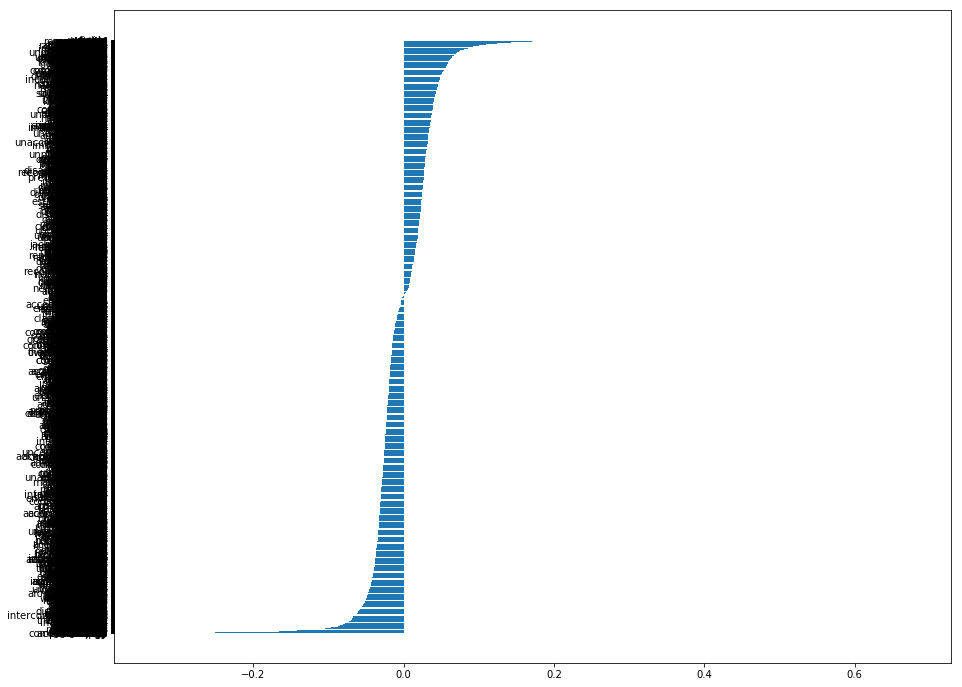

In [23]:
# plots the feature importance, but it is messy.

# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
#print("Current size:", fig_size)
 
# Set figure width to 15 and height to 12
fig_size[0] = 15
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size


def f_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp, names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    #plt.grid()
    plt.show()
    
vectorizer = TfidfVectorizer(min_df=0).fit(text_only)
features_names = vectorizer.get_feature_names()
clf = LinearSVC()
clf.fit(Xtfidf, ytfidf)

f_importances(clf.coef_.ravel(), features_names)